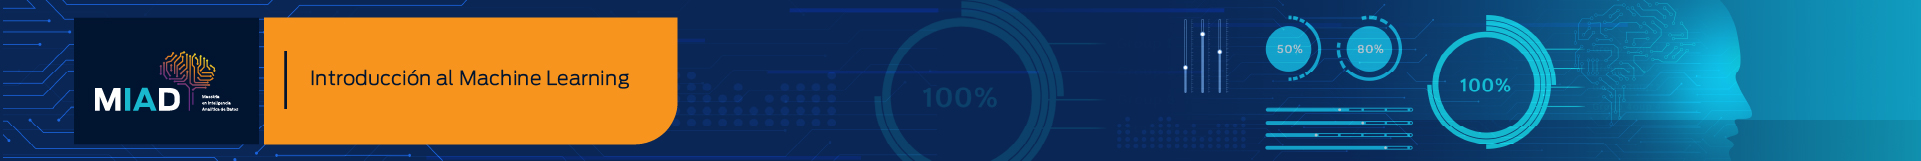

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing 

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
Smarket = pd.read_csv("Smarket.csv")  # Ruta absoluta
Smarket


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,Up
...,...,...,...,...,...,...,...,...,...
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,Down


Media, mediana, desviación estándar
Mínimo y máximo
Cuartiles

In [5]:
print(Smarket.describe())

        Unnamed: 0         Year         Lag1         Lag2         Lag3  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean    625.500000  2003.016000     0.003834     0.003919     0.001716   
std     360.988227     1.409018     1.136299     1.136280     1.138703   
min       1.000000  2001.000000    -4.922000    -4.922000    -4.922000   
25%     313.250000  2002.000000    -0.639500    -0.639500    -0.640000   
50%     625.500000  2003.000000     0.039000     0.039000     0.038500   
75%     937.750000  2004.000000     0.596750     0.596750     0.596750   
max    1250.000000  2005.000000     5.733000     5.733000     5.733000   

              Lag4        Lag5       Volume  
count  1250.000000  1250.00000  1250.000000  
mean      0.001636     0.00561     1.478305  
std       1.138774     1.14755     0.360357  
min      -4.922000    -4.92200     0.356070  
25%      -0.640000    -0.64000     1.257400  
50%       0.038500     0.03850     1.422950  
75%       0

In [6]:
print(Smarket['Direction'].value_counts(normalize=True) * 100)


Direction
Up      51.84
Down    48.16
Name: proportion, dtype: float64


 **Distribución de Retornos (Lag1 - Lag5)
Muestra cómo se distribuyen los retornos en los días previos.**

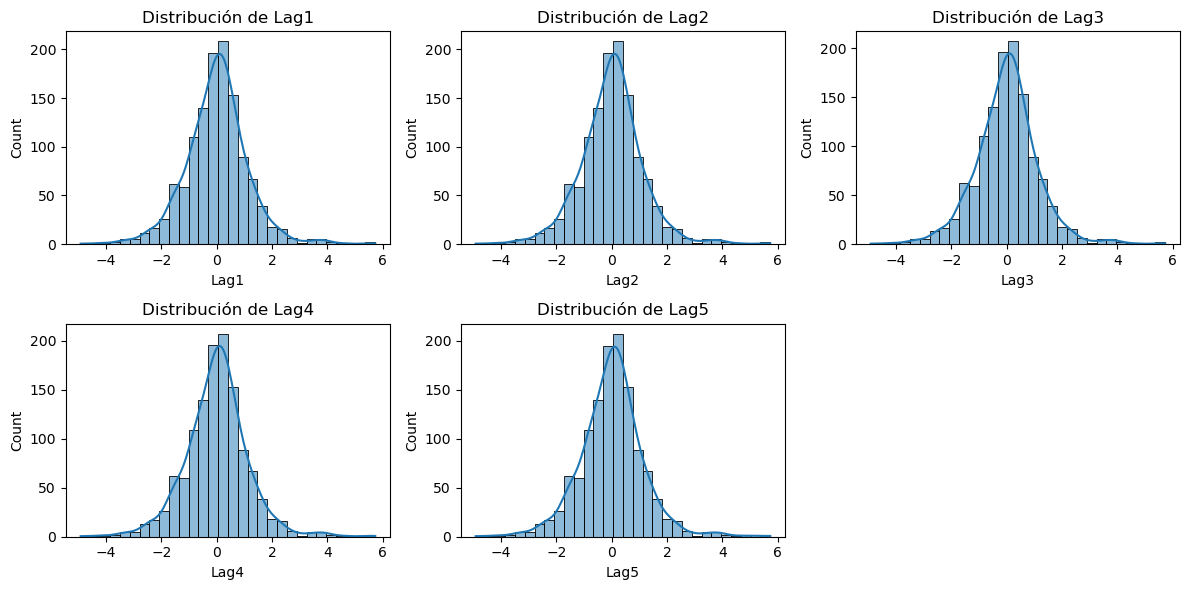

In [7]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']):
    plt.subplot(2, 3, i+1)
    sns.histplot(Smarket[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()




**Objetivo:** Ver si los retornos siguen una distribución normal o tienen sesgo

🔹 **Correlación entre Variables**

Para ver si hay relación entre los retornos previos y el resultado del día actual.

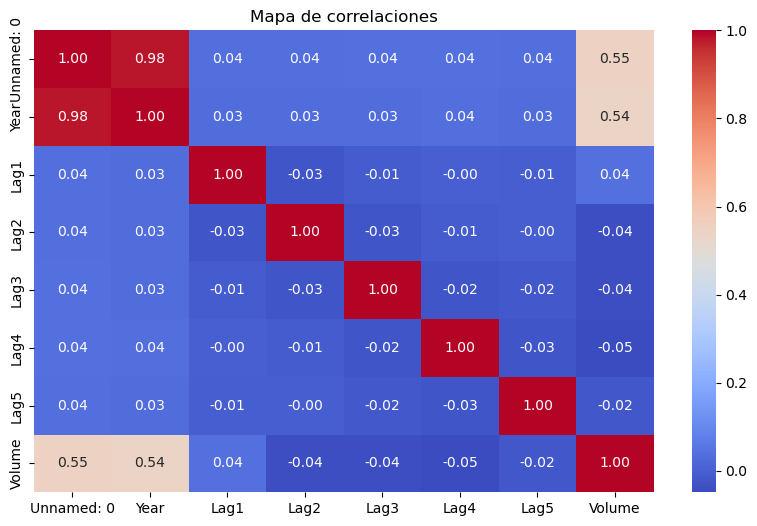

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(Smarket.drop(columns=['Direction']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()


**Objetivo:** Evaluar qué variables están más relacionadas entre sí.

**Volumen de Operaciones vs Año:**

Para ver si el volumen de transacciones ha aumentado con el tiempo.

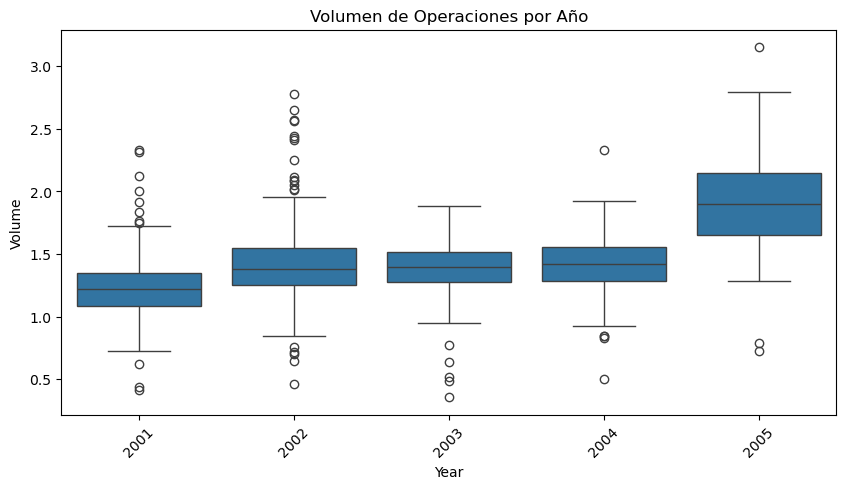

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='Volume', data=Smarket)
plt.title("Volumen de Operaciones por Año")
plt.xticks(rotation=45)
plt.show()

 **Objetivo:** Identificar tendencias de volumen a lo largo de los años.

**Distribución de Retornos según Dirección**

Para ver si los retornos tienen un patrón dependiendo del movimiento del mercado.

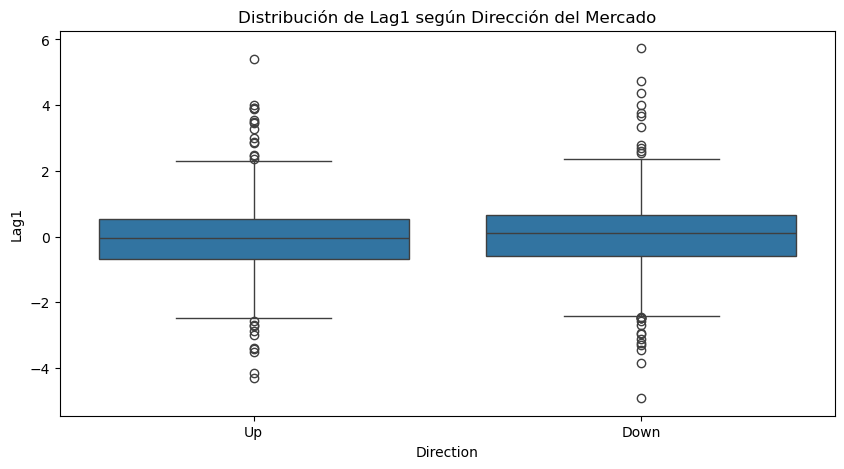

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Direction', y='Lag1', data=Smarket)
plt.title("Distribución de Lag1 según Dirección del Mercado")
plt.show()

**Objetivo:** Evaluar si hay diferencia significativa en los retornos cuando el mercado sube o baja.

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# Convertir la columna 'Direction' en valores numéricos
y_Total = Smarket['Direction'].map({'Up': 1, 'Down': 0})
x_Total = Smarket.drop(columns=['Direction'])

## Construimos las bases de Test y Train para las estimaciones
XTrain, XTest, yTrain, yTest = train_test_split(x_Total, y_Total, test_size=0.33, random_state=0)


In [12]:
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)

LinearDiscriminantAnalysis()

In [13]:
prediccionesLDA=clfLDA.predict(XTest)
prediccionesProbLDA=clfLDA.predict_proba(XTest)

In [14]:
# Convertir a NumPy arrays para evitar errores de indexado
yTest_array = yTest.to_numpy()
prediccionesLDA_array = prediccionesLDA

# Calcular error de clasificación
errorLDA = np.mean(yTest_array != prediccionesLDA_array)

# Imprimir resultado
print('El error de clasificación para LDA en la muestra de test es:')
print(errorLDA)

El error de clasificación para LDA en la muestra de test es:
0.46973365617433416


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [9]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [15]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrain,yTrain)

prediccionesRegLog=clfRegLog.predict(XTest)
prediccionesProbRegLog=clfRegLog.predict_proba(XTest)



In [16]:
print(confusion_matrix(y_true=yTest, y_pred=prediccionesRegLog))

[[ 60 147]
 [ 46 160]]


In [17]:
accuracyRegLog=accuracy_score(y_true=yTest, y_pred=prediccionesRegLog)
print(accuracyRegLog)

precisionRegLog=precision_score(y_true=yTest, y_pred=prediccionesRegLog)
print(precisionRegLog)

0.5326876513317191
0.5211726384364821


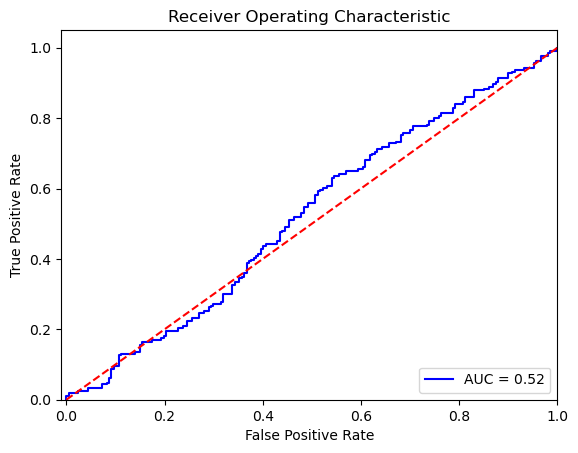

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbRegLog[:,1], pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

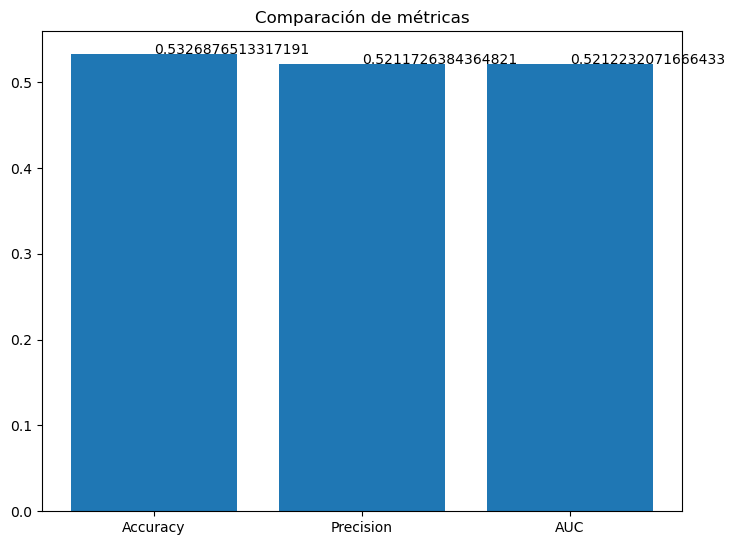

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [accuracyRegLog,precisionRegLog,AUCRegLog]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)